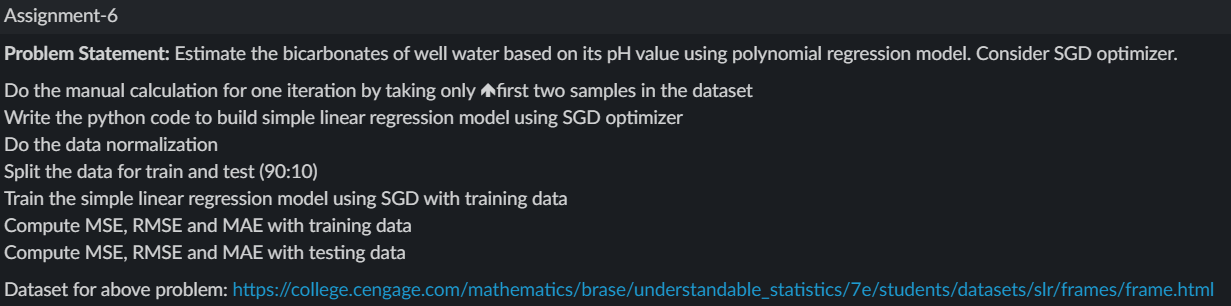

In [1]:
from PIL import Image
img = Image.open('Assignment-6 Q.png')
img

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
data = pd.read_csv('Assign6.csv')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [32]:
xmax, xmin = np.max(data['X']), np.min(data['X'])
data['X'] = (data['X'] - xmin) / (xmax - xmin)
ymax, ymin = np.max(data['Y']), np.min(data['Y'])
data['Y'] = (data['Y'] - ymin) / (ymax - ymin)
data.head()

,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


In [7]:
data.isnull().sum()

X    0
Y    0
dtype: int64

In [8]:
X = data['X']
Y = data['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.1, random_state=101)

In [33]:
m1 = np.random.uniform(-10, 10)
m2 = np.random.uniform(-10, 10)
c = np.random.uniform(-10, 10)
eeta = 0.1
epochs = 1000

#Train the model
for _ in range(epochs):
    for i in range(xtrain.shape[0]):
        x, y = xtrain.iloc[i], ytrain.iloc[i]
        ypred = (x ** 2) * m1 + x * m2 + c
        gradm1 = -1 * (x ** 2) * (y - ypred)
        gradm2 = -1 * x * (y - ypred)
        gradc = -1 * (y - ypred)
        m1 = m1 - eeta * gradm1
        m2 = m2 - eeta * gradm2
        c = c - eeta * gradc

#Display Model Parameters after training
print('Model Parameters :')
print('m1 =', m1)
print('m2 =', m2)
print('c =', c)

Model Parameters :
m1 = -0.2860598596533517
m2 = -0.11215641646973026
c = 0.5912132270741244


In [34]:
ytrainPred = []
for x in xtrain:
    ytrainPred.append(m1 * (x ** 2) + m2 * x + c)
ytestPred = []
for x in xtest:
    ytestPred.append(m1 * (x ** 2) + m2 * x + c)

In [35]:
xtrain = xtrain * (xmax - xmin) + xmin
ytrain = ytrain * (ymax - ymin) + ymin
xtest = xtest * (xmax - xmin) + xmin
ytest = ytest * (ymax - ymin) + ymin
ytrainPred = np.multiply(ytrainPred, (ymax - ymin)) + ymin
ytestPred = np.multiply(ytestPred, (ymax - ymin)) + ymin

In [36]:
MAE_Train = mean_absolute_error(ytrainPred, ytrain) #Testing MAE
MSE_Train = mean_squared_error(ytrainPred, ytrain) #Testing MSE
RMSE_Train = mean_squared_error(ytrainPred, ytrain) ** 0.5 #Testing RMSE
MAE_Test = mean_absolute_error(ytestPred, ytest) #Testing MAE
MSE_Test = mean_squared_error(ytestPred, ytest) #Testing MSE
RMSE_Test = mean_squared_error(ytestPred, ytest) ** 0.5 #Testing RMSE
print('Training Error :')
print('Mean Absolute Error :', MAE_Train)
print('Mean Squared Error :', MSE_Train)
print('Root Mean Squared Error :', RMSE_Train)
print('\nTesting Error :')
print('Mean Absolute Error :', MAE_Test)
print('Mean Squared Error :', MSE_Test)
print('Root Mean Squared Error :', RMSE_Test)

Training Error :
Mean Absolute Error : 44.70437369635162
Mean Squared Error : 2652.1449556075104
Root Mean Squared Error : 51.498980141431055

Testing Error :
Mean Absolute Error : 41.282575415148244
Mean Squared Error : 2760.629787283031
Root Mean Squared Error : 52.5416957023946


In [37]:
pd.DataFrame({'X_Train' : xtrain, 'Y_Train' : ytrain, 'Y_Train_Prediction' : ytrainPred})

,X_Train,Y_Train,Y_Train_Prediction
29,8.5,48.0,99.675189
26,8.4,35.0,106.041165
25,7.7,113.0,142.357205
27,7.4,125.0,153.503835
33,7.3,87.0,156.630393
2,8.2,175.0,117.889639
28,7.3,76.0,156.630393
19,7.9,155.0,133.453656
16,8.5,82.0,99.675189
10,8.1,215.0,123.372137


In [38]:
pd.DataFrame({'X_Test' : xtest,'Y_Test' : ytest,'Y_Test_Prediction' : ytestPred})

,X_Test,Y_Test,Y_Test_Prediction
18,8.2,202.0,117.889639
7,8.0,190.0,128.560142
20,7.6,157.0,146.367241
30,7.8,147.0,138.052677


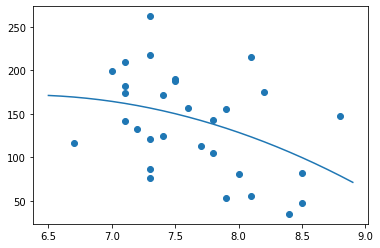

In [39]:
plt.scatter(np.array(xtrain, xtest), np.array(ytrain, ytest))
x = np.array([i/10 for i in range(65, 90)])
xnorm = (x - xmin) / (xmax - xmin)
ypred = np.multiply(np.multiply(xnorm, xnorm), m1) + np.multiply(m2, xnorm) + c
y = np.multiply(ypred, ymax - ymin) + ymin
plt.plot(x, y)
plt.show()